In [2]:
import pandas as pd
import time
import numpy as np
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer, util
    
def read_input_csv():
    df = pd.read_csv('./highcos-plagiarism_included.csv', sep=',')
    df1 = df[['essay']]
    df1_dict = df1.to_dict('dict')
    return df1, df1_dict

# calculate all sentence embeddings, put into dict
def create_embedding_dict(df_dict):
    embedding_dict = {}
    model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
    for key in df_dict['essay']:
        embedding_n = model.encode(df_dict['essay'][key], convert_to_tensor=True)
        embedding_dict[key]=embedding_n
        
    return embedding_dict

# cosine similarity of all sentence embeddings against each other, put into dataframe
def create_embedding_cosine_matrix(embedding_dict):
    # setup empty dataframe
    df_cosine_sim = pd.DataFrame()
    df_cosine_sim

    # setup empty meas_dict
    meas_dict = {}

    for key in embedding_dict:
        # first embedding
        embedding_1 = embedding_dict[key]
        # compare to every other essay except self
        i=0
        for item in embedding_dict:
            if key == item:
                meas_dict[i] = 1
                # print("for key: ",key," and item: ",item," we set meas: ",1)
                i=i+1
            else:
                embedding_2 = embedding_dict[item]
                meas = util.pytorch_cos_sim(embedding_1, embedding_2)
                # print("for key: ",key," and item: ",item," we found meas: ",meas.item())
                meas_dict[i] = meas.item()
                i=i+1

        # show dict status
        df_cosine_sim_col = pd.DataFrame.from_dict(meas_dict,orient='index')
        df_cosine_sim_col.columns = [key]
        # print(df_cosine_sim_col)
        df_cosine_sim = pd.concat([df_cosine_sim, df_cosine_sim_col], axis=1)
        
    return df_cosine_sim

def get_cosine_sim_matrix():
    df, df_dict = read_input_csv()
    embedding_dict1 = create_embedding_dict(df_dict)
    df_cosine_sim = create_embedding_cosine_matrix(embedding_dict1)
    return df_cosine_sim

def get_largest_for_column(df,column):
    n = 2
    topN = df.nlargest(n,[column])[column]
    largest = topN.min()
    idx = topN.idxmin()
    return largest,idx

def get_ranked_n_for_column(df,column):
    n = 2
    topN = df.nlargest(n,[column])
    
    # nth_series_idx[[0]]
    nth_series = df_cosine_sim.nlargest(3,[0])
    df_nth = nth_series[[0]]
    df_nth
    
    largest = topTwo.min()
    idx = topTwo.idxmin()
    return largest,idx

def get_largest_all_columns(df_cosine_sim,df_with_essays):
    df_out = pd.DataFrame()
    for col in df_cosine_sim.columns:
        largest,idx = get_largest_for_column(df_cosine_sim,col)            
        assigned_row = col
        match_column = "largestMatchIndex"
        measurement_column = "cosineSimilarity"
        value_column = "essay"
        df_out.at[assigned_row,match_column] = str(int(idx))
        df_out.at[assigned_row,measurement_column] = largest
        df_out.at[assigned_row,value_column] = df_with_essays['essay'][idx]
    return df_out

# def get_most_likely_plagerism():

def do_complete_analysis():
    df1, df1_dict = read_input_csv()
    df_cosine_sim = get_cosine_sim_matrix()
    df_out = get_largest_all_columns(df1,df_cosine_sim)
    return df_out

In [3]:
df_with_essays, df1_dict = read_input_csv()
df_cosine_sim = get_cosine_sim_matrix()

In [4]:
df_cosine_sim

,0,1,2,3,4,5,6,7,8,9,...,104,105,106,107,108,109,110,111,112,113
0,1.000000,0.706164,0.712626,0.735292,0.709133,0.697348,0.703265,0.713066,0.695918,0.710296,...,0.696442,0.710419,0.710756,0.714009,0.731787,0.706272,0.704179,0.723288,1.000000,0.938596
1,0.706164,1.000000,0.735531,0.673939,0.787773,0.659098,0.754841,0.709362,0.724589,0.673740,...,0.757221,0.786504,0.796014,0.795555,0.865651,0.816275,0.713949,0.789926,0.706164,0.741618
2,0.712626,0.735531,1.000000,0.671592,0.663086,0.631979,0.747021,0.640463,0.712477,0.666333,...,0.709859,0.717075,0.768661,0.729188,0.730650,0.790181,0.641908,0.829053,0.712626,0.723809
3,0.735292,0.673939,0.671592,1.000000,0.754412,0.755212,0.663023,0.687278,0.791680,0.776523,...,0.697527,0.718508,0.789089,0.767800,0.688202,0.711166,0.684341,0.712289,0.735292,0.770500
4,0.709133,0.787773,0.663086,0.754412,1.000000,0.713317,0.723781,0.774134,0.789895,0.680293,...,0.754487,0.755475,0.771176,0.857072,0.780461,0.728667,0.776380,0.728409,0.709133,0.759037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,0.706272,0.816275,0.790181,0.711166,0.728667,0.676576,0.764302,0.665146,0.759007,0.745575,...,0.747961,0.774947,0.819824,0.725275,0.817126,1.000000,0.696117,0.819107,0.706272,0.743978
110,0.704179,0.713949,0.641908,0.684341,0.776380,0.658796,0.725915,0.793674,0.708834,0.675997,...,0.697733,0.748544,0.755342,0.752365,0.744530,0.696117,1.000000,0.663602,0.704179,0.711517
111,0.723288,0.789926,0.829053,0.712289,0.728409,0.671825,0.772527,0.672900,0.727859,0.676336,...,0.746290,0.750905,0.810641,0.728160,0.782547,0.819107,0.663602,1.000000,0.723288,0.753293
112,1.000000,0.706164,0.712626,0.735292,0.709133,0.697348,0.703265,0.713066,0.695918,0.710296,...,0.696442,0.710419,0.710756,0.714009,0.731787,0.706272,0.704179,0.723288,1.000000,0.938596


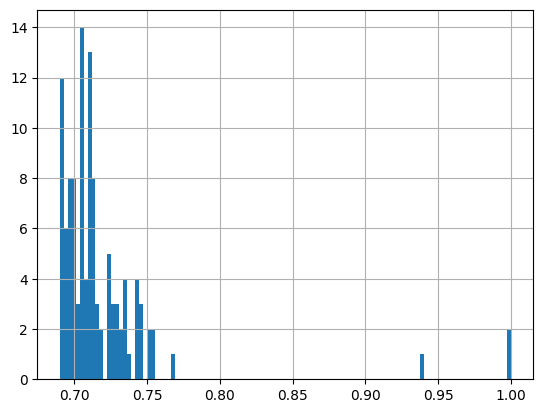

In [16]:
hist = df_cosine_sim[0].hist(bins=df_cosine_sim.shape[1])

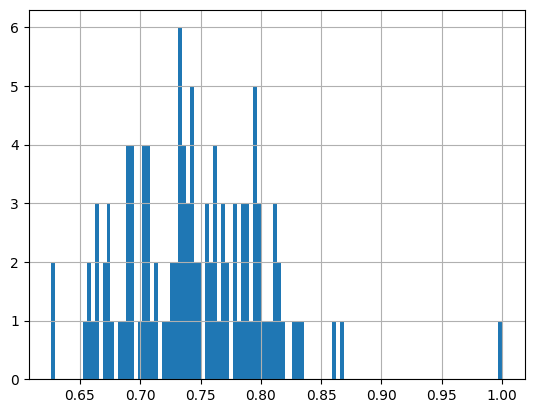

In [17]:
hist = df_cosine_sim[1].hist(bins=df_cosine_sim.shape[1])

In [8]:
def walkthrough_nomatch_counts(df_cosine_sim):
    numcols = df_cosine_sim.shape[1]
    numrows = df_cosine_sim.shape[0]
    df_nomatch = pd.DataFrame(index=range(numrows),columns=range(numcols)) 
    for col in range(0,numcols):
        for row in range(0,numrows):
            if col == row:
                df_nomatch[col][row] = np.nan
            elif col > row:
                df_nomatch[col][row] = np.nan
            elif col < row:
                df_nomatch[col][row] = df_cosine_sim[col][row]

    return df_nomatch

def get_stats_report(df_nomatch):
    get_plots(df_nomatch)
    get_meanmedvar(df_nomatch)
    
def get_plots(df_nomatch):
    nplotcols = 1
    nplotrows = 1
    fig1, axes1 = plt.subplots(nrows=nplotrows, ncols=nplotcols, figsize=(10, 10))
    plt.xlim([-0.1,1.1]) 
    histplot = df_nomatch.stack().hist(bins=100)
    fig2, axes2 = plt.subplots(nrows=nplotrows, ncols=nplotcols, figsize=(10, 10))
    plt.xlim([-0.1,1.1]) 
    distplot = df_nomatch.stack().plot.kde()
    
def get_meanmedvar(df_nomatch):
    print("The mean of the cosine similarity is       : ",df_nomatch.stack().mean())
    print("The median of the cosine similarity is     : ",df_nomatch.stack().median())
    print("The variance of the cosine similarity is   : ",df_nomatch.stack().var())
    stack_stdev = df_nomatch.stack().std()
    print("The stdev of the stack is                  : ",df_nomatch.stack().std())
    threshold = 0.9
    print(threshold, " would be #'s of stdev's from mean     : ",(threshold-df_nomatch.stack().mean())/stack_stdev)

In [6]:
df_nomatch = walkthrough_nomatch_counts(df_cosine_sim)
df_nomatch

,0,1,2,3,4,5,6,7,8,9,...,104,105,106,107,108,109,110,111,112,113
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.706164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.712626,0.735531,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.735292,0.673939,0.671592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.709133,0.787773,0.663086,0.754412,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109,0.706272,0.816275,0.790181,0.711166,0.728667,0.676576,0.764302,0.665146,0.759007,0.745575,...,0.747961,0.774947,0.819824,0.725275,0.817126,NaN,NaN,NaN,NaN,NaN
110,0.704179,0.713949,0.641908,0.684341,0.77638,0.658796,0.725915,0.793674,0.708834,0.675997,...,0.697733,0.748544,0.755342,0.752365,0.74453,0.696117,NaN,NaN,NaN,NaN
111,0.723288,0.789926,0.829053,0.712289,0.728409,0.671825,0.772527,0.6729,0.727859,0.676336,...,0.74629,0.750905,0.810641,0.72816,0.782547,0.819107,0.663602,NaN,NaN,NaN
112,1.0,0.706164,0.712626,0.735292,0.709133,0.697348,0.703265,0.713066,0.695918,0.710296,...,0.696442,0.710419,0.710756,0.714009,0.731787,0.706272,0.704179,0.723288,NaN,NaN


The mean of the cosine similarity is       :  0.7164613206764867
The median of the cosine similarity is     :  0.719557523727417
The variance of the cosine similarity is   :  0.003154128225247021
The stdev of the stack is                  :  0.056161625913492046
0.9  would be #'s of stdev's from mean     :  3.268044262219636


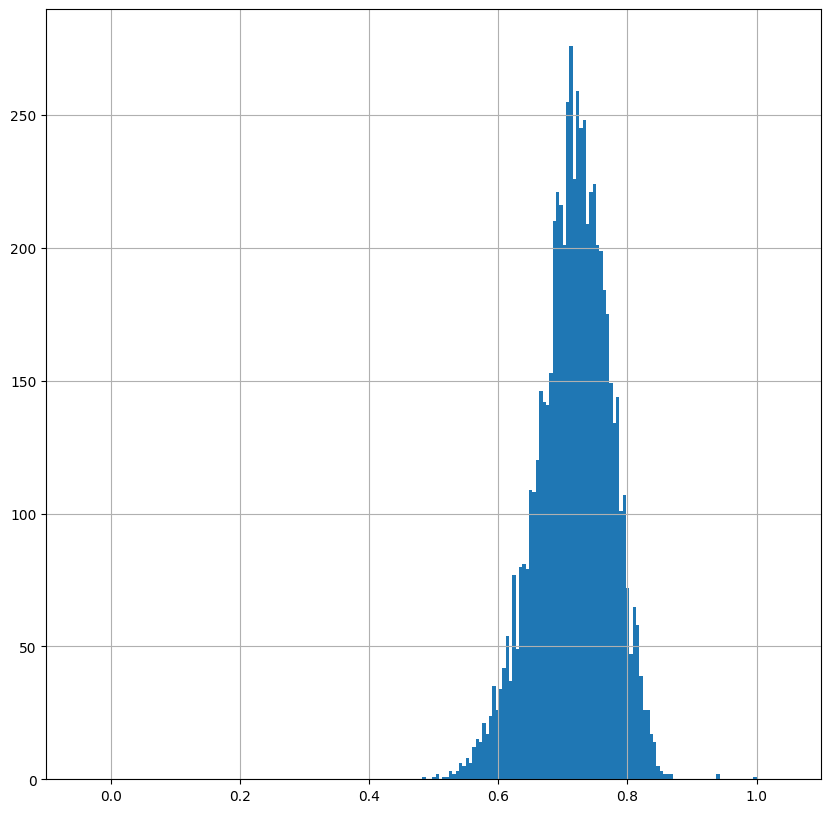

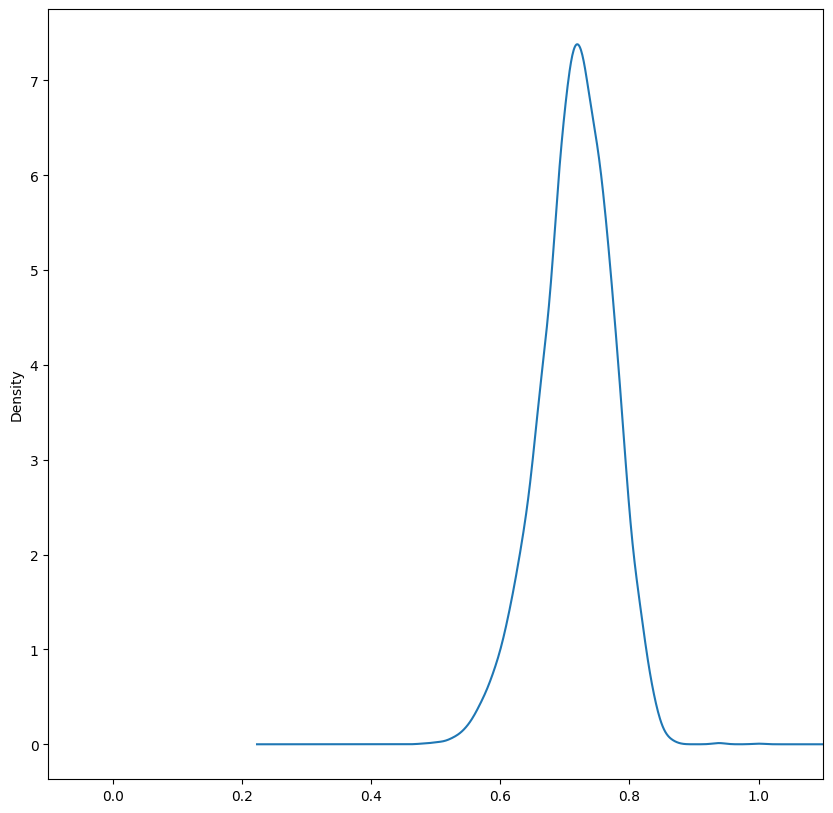

In [9]:
df_nomatch = walkthrough_nomatch_counts(df_cosine_sim)
get_stats_report(df_nomatch)

In [192]:
df_nomatch

,0,1,2,3,4,5,6,7,8,9,...,103,104,105,106,107,108,109,110,111,112
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.706164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.712626,0.735531,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.735292,0.673939,0.671592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.709133,0.787773,0.663086,0.754412,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,0.731787,0.865651,0.73065,0.688202,0.780461,0.692421,0.764158,0.780296,0.745254,0.689968,...,0.74833,0.728106,0.796629,0.784031,0.802385,NaN,NaN,NaN,NaN,NaN
109,0.706272,0.816275,0.790181,0.711166,0.728667,0.676576,0.764302,0.665146,0.759007,0.745575,...,0.716972,0.747961,0.774947,0.819824,0.725275,0.817126,NaN,NaN,NaN,NaN
110,0.704179,0.713949,0.641908,0.684341,0.77638,0.658796,0.725915,0.793674,0.708834,0.675997,...,0.68774,0.697733,0.748544,0.755342,0.752365,0.74453,0.696117,NaN,NaN,NaN
111,0.723288,0.789926,0.829053,0.712289,0.728409,0.671825,0.772527,0.6729,0.727859,0.676336,...,0.735427,0.74629,0.750905,0.810641,0.72816,0.782547,0.819107,0.663602,NaN,NaN


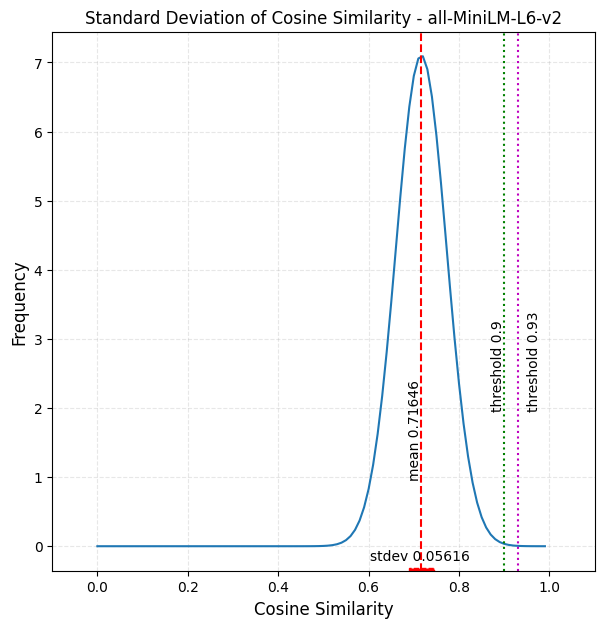

In [7]:
import scipy.stats as stats

# Entering in the Mean and Stdev
df_mean = 0.7164613206764867
df_std = 0.056161625913492046

x_axis = np.arange(0, 1, 0.01)
 
# Calculating probability density function (PDF)
pdf = norm.pdf(x_axis, df_mean, df_std)

# Drawing a graph
fig = plt.figure(1, figsize=(7, 7))
ax = fig.add_subplot(111)
plt.plot(x_axis, pdf)
plt.xlim([-0.1,1.1])  
plt.xlabel("Cosine Similarity", size=12)    
plt.ylabel("Frequency", size=12)                
plt.grid(True, alpha=0.3, linestyle="--")
plt.axvline(x = df_mean,color='r',linestyle='dashed')
plt.axvspan(xmin = df_mean-df_std/2, xmax=df_mean+df_std/2,ymin=0,ymax=0.005,color='r',linestyle='dashed')

meanStr = "mean " + str(round(df_mean,5))
plt.text(df_mean-0.03,1,meanStr,rotation=90)
stdStr = "stdev " + str(round(df_std,5))
plt.text(df_mean-df_std*2,-0.2,stdStr,rotation=0)

threshold=0.9
plt.axvline(x = threshold,color='g',linestyle='dotted')
thresholdStr = "threshold " + str(threshold)
plt.text(threshold-0.03,2,thresholdStr,rotation=90)

offset=0.03
thresholdoffset = round(threshold+offset,2)
plt.axvline(x = thresholdoffset,color='m',linestyle='dotted')
thresholdStr = "threshold " + str(thresholdoffset)
plt.text(thresholdoffset+0.02,2,thresholdStr,rotation=90)


plt.title("Standard Deviation of Cosine Similarity - all-MiniLM-L6-v2")
plt.show()

In [12]:
df_nomatch.columns.values

TypeError: 'numpy.ndarray' object is not callable

In [1]:
import scipy.stats as stats
from scipy.stats import norm

# Calculating mean and Stdev of AGW
df_mean = 0.7164613206764867
df_std = 0.056161625913492046

pdf = stats.norm.pdf(df_nomatch.columns.values.tolist(), df_mean, df_std)
pdf

NameError: name 'df_nomatch' is not defined